<a href="https://colab.research.google.com/github/takwa1122/udemy_exercice_me/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
np.random.seed(42)

#Generate random data
n_samples= 500
X1=np.random.uniform(1,10,n_samples)  # Random hours studied
noise= np.random.normal(1,5,n_samples) # Random noise
y = 10*X1 + noise


In [ ]:
#Create a DataFrame for easy manipulation

data=pd.DataFrame({'Hours_Studied': X1, 'Test_Score': y})
data.head()


,Hours_Studied,Test_Score
0,4.370861,46.417391
1,9.556429,105.945142
2,7.587945,81.631574
3,6.387926,61.994745
4,2.404168,20.549604


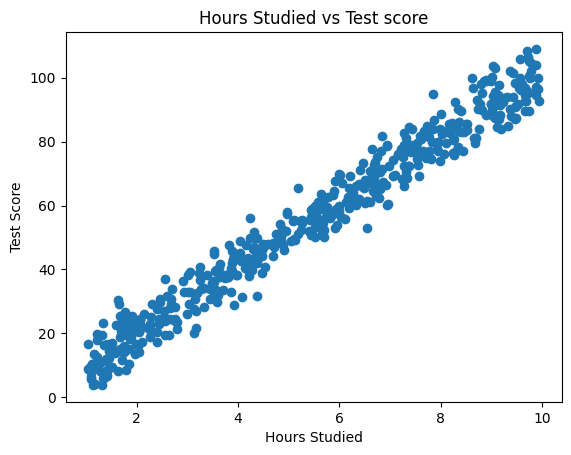

               Hours_Studied  Test_Score
Hours_Studied       1.000000    0.983399
Test_Score          0.983399    1.000000


In [ ]:
# Scatter plot to visualize the relationship
plt.scatter(data['Hours_Studied'],data['Test_Score'])
plt.title('Hours Studied vs Test score')
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.show()

#Check the correlation between features and target
corr_matrix =data.corr()
print(corr_matrix)

In [ ]:
# Split the dataset into independent variables X and dependent variable y
X= data[['Hours_Studied']]
y=data['Test_Score']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale the features using StandardScoler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
#Instantiate the linear regression model
model= LinearRegression()

#Train the model on the training data
model.fit(X_train_scaled,y_train)

# Check the model's coefficients and intercept
print("Coeff:", model.coef_)
print("Intercept:", model.intercept_)

Coeff: [27.31629308]
Intercept: 56.3158868351413


In [ ]:
# Example of pred a single value using a new data point
new_data =np.array([6])
new_data_df = pd.DataFrame(new_data, columns=['Hours_Studied'])

# Scale the new data
new_data_scaled=scaler.transform(new_data_df)

# Predict the test score
single_prediction= model.predict(new_data_scaled)
print(f"Predicted Test Score for 6 hours of study: {single_prediction[0]}")



Predicted Test Score for 6 hours of study: 61.03282292232382


In [ ]:
# Predict on the test set
y_pred=model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squard (R)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 26.105427937987944
R-squared: 0.9645671742510007


In [ ]:
# Save the trained model to a file
joblib.dump(model,'linear_regression_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [ ]:
!pip install streamlit
!pip install pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import joblib

# Load the model and scaler
model = joblib.load("linear_regression_model.pkl")
scaler = joblib.load("scaler.pkl")

# Streamlit app
st.title("MetaBrains Student Test Score Predictor")
st.write("Enter the number of hours studied to predict the test score.")

# User input
hours = st.number_input("Hours studied:", min_value=0.0, step=1.0)

if st.button("Predict"):
    try:
        scaled_data = scaler.transform([[hours]])  # correct format
        prediction = model.predict(scaled_data)
        st.success(f"✅ Predicted Test Score: {prediction[0]:.2f}")
    except Exception as e:
        st.error(f"❌ Error: {e}")


Overwriting app.py


In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2CcRkgbynZm9m4rmhg1nYZWagX6_5tYWSbp8Pt61u6Ciw9TYJ")

In [ ]:
%%writefile app.py
import streamlit as st
import joblib

model = joblib.load("linear_regression_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("MetaBrains Student Test Score Predictor")

hours = st.number_input("Hours studied:", min_value=0.0, step=1.0)

if st.button("Predict"):
    scaled = scaler.transform([[hours]])
    result = model.predict(scaled)
    st.success(f"Predicted Score: {result[0]:.2f}")



Overwriting app.py


In [ ]:

!nohup streamlit run app.py --server.address 0.0.0.0 --server.port 8501 &



nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok

# Connect streamlit port 8501
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://6ebf98b40420.ngrok-free.app" -> "http://localhost:8501">

In [ ]:
!git config --global user.email "mekni.takwa@isi.utm.tn"
!git config --global user.name "takwa1122"


In [51]:
import requests

username = "mekni.takwa@isi.utm.tn"
token = "takwa1122"
repo_name = "my-streamlit-project"

url = "https://github.com/takwa1122"
data = {"name": repo_name, "private": False}

response = requests.post(url, auth=(username, token), json=data)

print("✅ Repository created!" if response.status_code == 201 else "❌ Error:", response.json())


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [54]:
%mkdir my_streamlit_project
%cd my_streamlit_project



mkdir: cannot create directory ‘my_streamlit_project’: File exists
/content/my_streamlit_project


In [ ]:
%%writefile app.py
print("Hello from Streamlit app structure placeholder")




Writing app.py


In [52]:
!git init


Reinitialized existing Git repository in /content/my_streamlit_project/.git/


In [ ]:
!git add .
!git commit -m "Initial commit from Google Colab"


[master (root-commit) 096a490] Initial commit from Google Colab
 1 file changed, 3 insertions(+)
 create mode 100644 app.py


In [ ]:
!git push https://github.com/takwa1122/takwa1122.git


fatal: could not read Username for 'https://github.com': No such device or address


In [60]:
%cd ..

/content


In [61]:
%cd my_streamlit_project

/content/my_streamlit_project


In [62]:
%%writefile linear_regression_model.pkl
username = "mekni.takwa@isi.utm.tn"
token = "takwa1122"

Writing linear_regression_model.pkl


In [64]:
%cd /content/my_streamlit_project
!git init
!git config --global user.name "takwa1122"
!git config --global user.email "mekni.takwa@isi.utm.tn"
!git remote add origin https://github.com/takwa1122/udemy_exercice_me.git
!git add .
!git commit -m "Initial push"
!git branch -M main
!git push -u origin main


/content/my_streamlit_project
Reinitialized existing Git repository in /content/my_streamlit_project/.git/
[master 78a91cb] Initial push
 2 files changed, 2 insertions(+)
 create mode 100644 linear_regression_model.pkl
 create mode 100644 scaler.pkl
fatal: could not read Username for 'https://github.com': No such device or address
